In [3]:
import pandas as pd
BetterLife = pd.read_csv('datasets\BetterLife.csv')

In [4]:
BetterLife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 17 columns):
LOCATION                 3398 non-null object
Country                  3398 non-null object
INDICATOR                3398 non-null object
Indicator                3398 non-null object
MEASURE                  3398 non-null object
Measure                  3398 non-null object
INEQUALITY               3398 non-null object
Inequality               3398 non-null object
Unit Code                3398 non-null object
Unit                     3398 non-null object
PowerCode Code           3398 non-null int64
PowerCode                3398 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3398 non-null float64
Flag Codes               1136 non-null object
Flags                    1136 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 451.4+ KB


In [31]:
BetterLife = BetterLife[(BetterLife.Indicator=='Life satisfaction') & (BetterLife.INEQUALITY=='TOT')]

In [32]:
gdpData = pd.read_csv('datasets\WEO_Data.xls',delimiter='\t',encoding='latin1', na_values='n\a',thousands=',')

In [33]:
gdpData.head(10)

Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   
5            Argentina  Gross domestic product per capita, current prices   
6              Armenia  Gross domestic product per capita, current prices   
7            Australia  Gross domestic product per capita, current prices   
8              Austria  Gross domestic product per capita, current prices   
9           Azerbaijan  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
5  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
6  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
7  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
8  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
9  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015  Estimates Start After  
0    599.994                 2013.0  
1   3995.383                 2010.0  
2   4318.135                 2014.0  
3   4100.315                 2014.0  
4  14414.302                 2011.0  
5  13588.846                 2013.0  
6   3534.860                 2014.0  
7  50961.865                 2014.0  
8  43724.031                 2015.0  
9   5739.433                 2014.0

In [34]:
"""
Now next step is to join BetterLife table with GDP table
"""

BetterLife.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [35]:
gdpData.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [39]:
MergedData = BetterLife[['Country','Value']].set_index('Country').join(gdpData[['Country','2015']].set_index('Country'),how='inner')

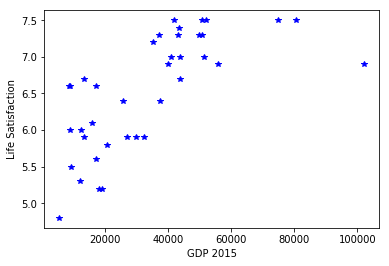

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(MergedData['2015'],MergedData.Value,'b*')
plt.xlabel('GDP 2015')
plt.ylabel('Life Satisfaction')
plt.show()

In [49]:
import numpy as np

X = np.c_[MergedData['2015']]
y = np.c_[MergedData.Value]

In [50]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [51]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
linreg.coef_

array([[2.46864974e-05]])

In [53]:
linreg.intercept_

array([5.68866936])

In [55]:
linreg.predict([[22587]])

array([[6.24626328]])